# Elliptic potential for the triaxial nucleus $^{163}$Lu

# The chiral potential $V_\text{chiral}$

## Author: Robert Poenaru

e-mail: <robert.poenaru@drd.unibuc.ro>

This project is calculating the triaxial potential for the odd-$A$ nucleus $^{163}$Pr. 

> Code

### Import modules

In [87]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sp
from matplotlib import rc
import tikzplotlib

### Define the single-particle angular momentum components
$$\mathbf{j}=\left\{j_1,j_2,j_3\right\}$$
with 
$$j_1=j\cos\theta$$
and 
$$j_2=j\sin\theta$$

In [88]:
def j1(j,theta):
    degrees=theta*np.pi/180.0
    return j*np.cos(degrees)
def j2(j,theta):
    degrees=theta*np.pi/180.0
    return j*np.sin(degrees)

### Define the elliptic variables $A,u,v_0,k$

In [89]:
def aFct(spin,j,theta,a1,a2):
    term1=1-j2(j,theta)/spin
    term2=a2*term1-a1
    return term2

def uFct(spin,j,theta,a1,a2,a3):
    term1=a3-a1
    term2=aFct(spin,j,theta,a1,a2)
    return term1/term2

def v0Fct(spin,j,theta,a1,a2,a3):
    term1=a1*j1(j,theta)
    return -term1/aFct(spin,j,theta,a1,a2)

def kFct(spin,j,theta,a1,a2,a3):
    term=uFct(spin,j,theta,a1,a2,a3)
    return np.sqrt(term)

# THE JACOBI AMPLITUDE CALCULUS

## Define the linear $k$ argument which enters in the elliptic function

In [90]:
def fiVar(u,k):
    return sp.ellipj(u,k)

## Define the quadratic $k$ argument which enters in the elliptic function

In [91]:
def fiVar_sq(u,k):
    ksq=np.power(k,2)
    return sp.ellipj(u,ksq)

## Test the elliptic variables

In [92]:
def printer(u,k):
    ksquared=np.power(k,2)
    fipair=(fiVar(u,k)[3],fiVar(u,ksquared)[3])
    return fipair

qArray=[]
kArray=[]
ksqArray=[]
for i in np.arange(0,9,1.0):
    print(i,printer(i,0.5))
    qArray.append(i)
    kArray.append(printer(i,0.5)[0])
    ksqArray.append(printer(i,0.5)[1])

0.0 (0.0, 0.0)
1.0 (0.9323150798838539, 0.9660310526366139)
2.0 (1.6741639220482394, 1.8440491178856986)
3.0 (2.4600021012296027, 2.7721668994372144)
4.0 (3.431410753482452, 3.7605670271403726)
5.0 (4.304620857222439, 4.6628013359701725)
6.0 (5.026814633689735, 5.555423639554034)
7.0 (5.872672281436279, 6.539486453212575)
8.0 (6.851503073148641, 7.4798994265728345)


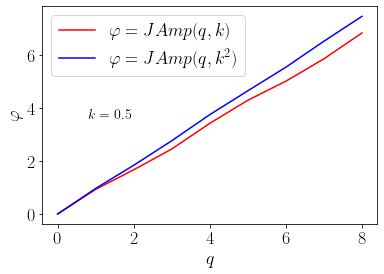

In [93]:
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
fig, ax=plt.subplots()
ax.plot(qArray,kArray,'r-',label='$\\varphi=JAmp(q,k)$')
ax.plot(qArray,ksqArray,'b-',label='$\\varphi=JAmp(q,k^2)$')
plt.xlabel('$q$')
plt.ylabel('$\\varphi$')
ax.text(0.2, 0.5, '$k=0.5$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
plt.legend(loc='best')
plt.savefig('jacobiAmpl.pdf',bbox_inches='tight')
plt.show()

In [94]:
qArray=[]
kArray=[]
ksqArray=[]
for i in np.arange(0,9,1.0):
    myk=kFct(45/2,13/2,210,1/(2*20),1/(2*100),1/(2*40))
    result=printer(i,myk)
    qArray.append(i)
    kArray.append(result[0])
    ksqArray.append(result[1])
    print(result)

(0.0, 0.0)
(0.8915386362062283, 0.9124321203112075)
(1.45080089258313, 1.5674613496127106)
(1.9163501357976978, 2.220508522901667)
(2.622629327497944, 3.130344007288082)
(3.59047820203022, 4.045333057637743)
(4.324712038259995, 4.7023837752157505)
(4.797606381658718, 5.353488687660488)
(5.337582832500058, 6.260688937376585)


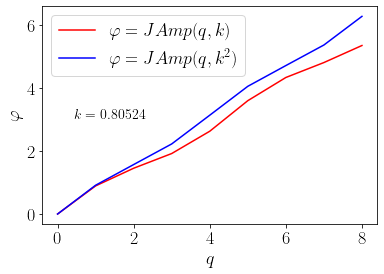

In [95]:
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
fig, ax=plt.subplots()
ax.plot(qArray,kArray,'r-',label='$\\varphi=JAmp(q,k)$')
ax.plot(qArray,ksqArray,'b-',label='$\\varphi=JAmp(q,k^2)$')
plt.xlabel('$q$')
plt.ylabel('$\\varphi$')
ax.text(0.2, 0.5, '$k=0.80524$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
plt.legend(loc='best')
plt.savefig('jacobiAmpl_customk.pdf',bbox_inches='tight')
plt.show()

## Generate the elliptic coordinates $s,c,d$

In [96]:
def ellipticArg(q,spin,theta,paramSet):
    #paramSet is a tuple of the form (SPIN,j,A1,A2,A3)
    #spin=paramSet[0]
    oddSpin=paramSet[1]
    a1=paramSet[2]
    a2=paramSet[3]
    a3=paramSet[4]
    currentK=kFct(spin,oddSpin,theta,a1,a2,a3)
    #work with linear k
    fi=fiVar(q,currentK)
    #work with quadratic k
    fi2=fiVar_sq(q,currentK)
    resultTuple=(fi,fi2)
    return resultTuple[1]
    
def sVar(q,spin,theta,paramSet):
    fi=ellipticArg(q,spin,theta,paramSet)
    return fi[0]

def cVar(q,spin,theta,paramSet):
    fi=ellipticArg(q,spin,theta,paramSet)
    return fi[1]

def dVar(q,spin,theta,paramSet):
    fi=ellipticArg(q,spin,theta,paramSet)
    return fi[2]

## Defining the parameter set  - according to DRAFT

> `pSet`=$\left\{I,j,A_1,A_2,A_3\right\}$

In [97]:
pSet=[45/2,13/2,1/(2*20),1/(2*100),1/(2*40)]
print(pSet)

[22.5, 6.5, 0.025, 0.005, 0.0125]


# Defining the triaxial rotor potential $V_\theta(q)$

In [98]:
def rotorPotential(q,spin,theta,paramSet):
    #paramSet is a tuple of the form (SPIN,j,A1,A2,A3)
    #spin=paramSet[0]
    oddSpin=paramSet[1]
    a1=paramSet[2]
    a2=paramSet[3]
    a3=paramSet[4]
    v0=v0Fct(spin,oddSpin,theta,a1,a2,a3)
    k=kFct(spin,oddSpin,theta,a1,a2,a3)
    s=sVar(q,spin,theta,paramSet)
    c=cVar(q,spin,theta,paramSet)
    d=dVar(q,spin,theta,paramSet)
    #define the potential sub-terms
    t1=spin*(spin+1.0)*np.power(k,2)+np.power(v0,2)
    t2=(2.0*spin+1.0)*v0*c*d
    t3=t1*np.power(s,2)
    vRotor=t3+t2
    return vRotor

## Rotor potential - graphical representation 

In [99]:
qTable=[]
vTable=[]
for i in np.arange(-8,8,0.1):
    qTable.append(i)
    vTable.append(rotorPotential(i,45/2,30,pSet))

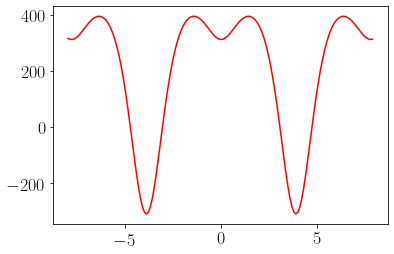

In [100]:
plt.plot(qTable,vTable,'r-')

# The chiral potential definition

$V_\text{chiral}=\left\{V_\text{s},V_\text{a}\right\}$

$V_s\to$ **symmetric potential** $V_\text{symmetric}=\frac{V_{\theta_1}+V_{\theta_2}}{2}$

$V_a\to$ **anti-symmetric potential** $V_\text{antisymmetric}=\frac{V_{\theta_1}-V_{\theta_2}}{2}$

## The potentials $V_\theta$ depend on the set of angles {$\theta_1$,$\theta_2$}
> in this case $\theta_1=30^o$ and $\theta_2=210^o$

In [101]:
def chiralPotential(q,spin,theta1,theta2,paramSet):
    potential1=rotorPotential(q,spin,theta1,paramSet)
    potential2=rotorPotential(q,spin,theta2,paramSet)
    #the symmetric potential
    symmetricTerm=0.5*(potential1+potential2)
    antiTerm=0.5*(potential1-potential2)
    chiralTuple=(symmetricTerm, antiTerm)
    return chiralTuple

def vSym(q,spin,theta1,theta2,paramSet):
    return chiralPotential(q,spin,theta1,theta2,paramSet)[0]

def vAsym(q,spin,theta1,theta2,paramSet):
    return chiralPotential(q,spin,theta1,theta2,paramSet)[1]

In [102]:
vaTable=[]
vsTable=[]
for i in qTable:
    myspin=45/2
    theta1=30
    theta2=210
    vaTable.append(vAsym(i,myspin,theta1,theta2,pSet))
    vsTable.append(vSym(i,myspin,theta1,theta2,pSet))

## Calculus for the anti-symmetric potential

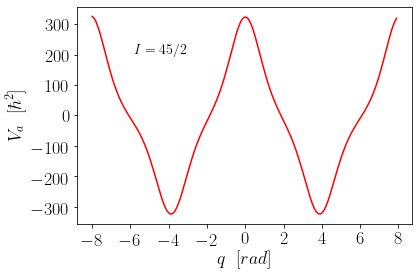

In [103]:
fig, ax=plt.subplots()
ax.plot(qTable,vaTable,'r-')
#plt.title('The antisymmetric potential $V_a(q)$')
plt.xlabel('$q\ \  [rad]$')
plt.ylabel('$V_a\ \  [\hbar^2]$')
ax.text(0.25, 0.8, '$I=45/2$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.set_xticks([-8,-6,-4,-2,0,2,4,6,8])
ax.set_yticks([-300,-200,-100,0,100,200,300])
plt.savefig('antiSymmetricPotential.pdf',bbox_inches='tight')
plt.show()

## Calculus for the symmetric potential

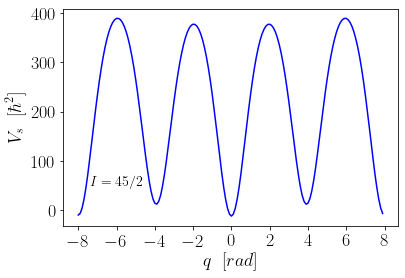

In [104]:
fig, ax=plt.subplots()
ax.plot(qTable,vsTable,'b-')
#plt.title('The symmetric potential $V_s(q)$')
plt.xlabel('$q\ \  [rad]$')
plt.ylabel('$V_s\ \  [\hbar^2]$')
ax.text(0.16, 0.2, '$I=45/2$', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=14)
ax.set_xticks([-8,-6,-4,-2,0,2,4,6,8])
ax.set_yticks([0,100,200,300,400])
plt.savefig('symetricPotential.pdf',bbox_inches='tight')
# plt.show()
tikzplotlib.save("test.tex")